In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import sys
sys.path.append(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\src\data')
import function as fnc

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv(r'C:\Users\faisa\Desktop\DataSciencePurwadhika\Modul2\CapstonProjectModul2\data\processed\SupermarketCustomer.csv', parse_dates=['Dt_Customer'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11


> ### make variable contains create a variable that contains column names based on the category in .pdf

In [4]:
people = ['ID', 'Year_Birth', 'age', 'age_category', 'Education', 'Marital_Status', 'Income', 'num_children', 'Dt_Customer', 'Recency', 'Complain']
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
promotion = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [4]:
# sns.distplot(df['age'], kde=True);
# plt.axvline(x=df['age'].mean(), c='red', label='mean')
# plt.axvline(x=df['age'].median(), c='b', label='median')
# plt.legend()

# from scipy.stats import shapiro

# # check the distribution
# stats, pvalue = shapiro(df['age'])
# # check the pvalue
# if pvalue > 0.05:
#         print(f"pvalue: {pvalue}. So, age has normal distribution")
# else:
#         print(f"pvalue: {pvalue}. So, age has NOT normal distribution")

> ### exploration in Place: NumWebPurchases, NumWebVisitsMonth, NumCatalogPurchases, NumStorePurchases.

<Axes: xlabel='MntWines'>

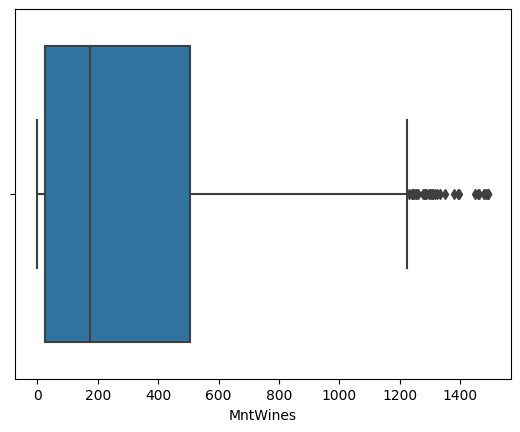

In [10]:
sns.boxplot(df, x='MntWines')

In [11]:
mntwines = fnc.checkquantiles(df, 'MntWines')
upperbound = mntwines[3] + (1.5 * (mntwines[3] - mntwines[1]))
df.loc[df['MntWines'] > upperbound]

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
102,7431,1991,21,PhD,Single,68126.0,0,2012-11-10,40,0,1332,17,311,23,51,86,1,0,0,0,1,0,1,7,4,5,9,3,11,adults
150,9260,1945,67,PhD,Married,70356.0,0,2012-11-05,20,0,1349,16,249,43,16,33,2,0,0,0,0,0,0,10,6,9,6,3,11,old adults
284,2926,1952,60,Master,Married,55951.0,1,2012-08-23,62,0,1241,0,80,0,13,40,3,0,1,0,1,0,0,3,6,11,8,3,11,old adults
411,6932,1941,72,PhD,Married,93027.0,0,2013-04-13,77,0,1285,42,716,55,0,21,0,0,0,0,0,1,0,7,10,5,2,3,11,old adults
417,3725,1961,52,PhD,Single,84865.0,0,2013-05-09,1,0,1248,16,349,43,16,16,1,1,1,0,1,1,1,2,4,9,4,3,11,middle-aged adults
453,7999,1955,58,PhD,Married,75261.0,0,2013-04-23,17,0,1239,17,413,23,34,17,1,0,0,0,1,1,1,5,6,5,2,3,11,middle-aged adults
484,11088,1971,42,PhD,Married,78642.0,1,2013-04-21,83,0,1396,0,322,46,35,17,1,0,0,0,0,0,0,4,9,4,6,3,11,middle-aged adults
502,203,1975,38,Master,Single,81169.0,0,2013-04-14,47,0,1288,20,613,80,61,27,1,0,0,0,0,0,0,5,7,9,2,3,11,adults
510,4943,1953,59,Graduation,Married,70503.0,0,2012-09-30,73,0,1379,33,216,0,33,66,1,0,0,0,1,1,0,2,4,9,6,3,11,middle-aged adults
530,5547,1982,31,PhD,Married,84169.0,0,2013-08-07,9,0,1478,19,403,0,19,0,1,0,0,0,1,1,1,7,6,6,3,3,11,adults


In [12]:
dftrial = df[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].groupby(['Marital_Status','Education']).agg('sum').reset_index()
dftrial

,Marital_Status,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Divorced,Basic,0,1,3,10,6,9,1,0,3,8
1,Divorced,Graduation,35769,3929,19395,4472,3949,5839,495,332,697,636
2,Divorced,Master,19229,1316,8539,1854,1552,2885,267,147,341,343
3,Divorced,PhD,20366,1117,6911,1794,715,2006,237,141,309,286
4,Married,Basic,332,431,454,701,488,841,69,13,99,238
5,Married,Graduation,207331,21307,128290,30888,22354,36328,3003,1930,4230,3815
6,Married,Master,100620,9115,51945,13695,9500,15260,1480,915,2164,2005
7,Married,PhD,128427,6085,55640,7900,5879,9507,1347,962,1889,1628
8,Single,Basic,56,165,137,176,153,352,30,12,49,120
9,Single,Graduation,66347,8251,47554,11382,7418,12907,1007,688,1430,1339


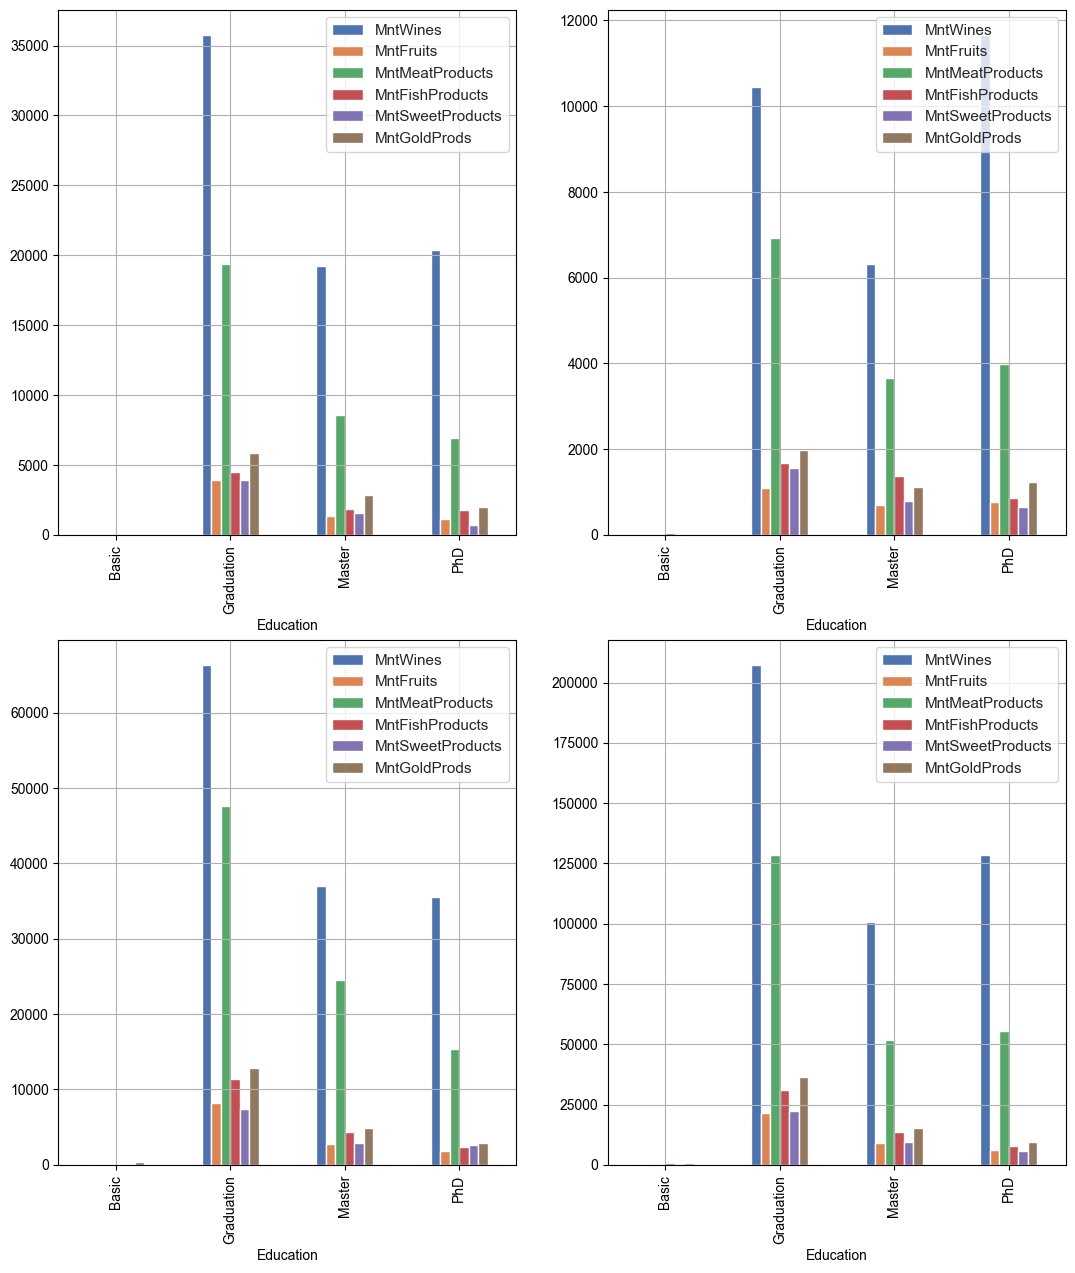

In [13]:
dftrial_divorced = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Divorced'")

dftrial_widow = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Widow'")

dftrial_single = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Single'")

dftrial_married = dftrial[['Marital_Status', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                    .query("Marital_Status == 'Married'")


fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13,15))

rows1 = [ax1,ax2]
rows2 = [ax3,ax4]
dflist1 = [dftrial_divorced, dftrial_widow]
dflist2 = [dftrial_single, dftrial_married]
label1 = ['Divorced', 'Widow']
label2 = ['Single', 'Married']



for i in zip(dflist1, dflist2, rows1, rows2, label1, label2):
    sns.set_theme(style="whitegrid")
    i[0].plot(kind='bar',x='Education',ax=i[2],label=i[-2])
    i[1].plot(kind='bar',x='Education',ax=i[3],label=i[-1])

In [14]:
df.query("Income < 700000")

,ID,Year_Birth,age,Education,Marital_Status,Income,num_children,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,age_category
0,5524,1957,55,Graduation,Single,58138.000000,0,2012-09-04,58,0,635,88,546,172,88,88,3,0,0,0,0,0,1,8,10,4,7,3,11,middle-aged adults
1,2174,1954,60,Graduation,Single,46344.000000,2,2014-03-08,38,0,11,1,6,2,1,6,2,0,0,0,0,0,0,1,1,2,5,3,11,old adults
2,4141,1965,48,Graduation,Married,71613.000000,0,2013-08-21,26,0,426,49,127,111,21,42,1,0,0,0,0,0,0,8,2,10,4,3,11,middle-aged adults
3,6182,1984,30,Graduation,Married,26646.000000,1,2014-02-10,26,0,11,4,20,10,3,5,2,0,0,0,0,0,0,2,0,4,6,3,11,adults
4,5324,1981,33,PhD,Married,58293.000000,1,2014-01-19,94,0,173,43,118,46,27,15,5,0,0,0,0,0,0,5,3,6,5,3,11,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,42,Graduation,Married,42075.500000,2,2013-03-03,82,0,71,1,16,0,0,9,4,0,0,0,0,0,0,2,1,3,8,3,11,middle-aged adults
2236,10339,1954,59,Master,Married,52884.500000,1,2013-06-23,83,0,161,0,22,0,0,24,2,0,0,0,0,0,0,4,1,4,6,3,11,middle-aged adults
2237,3117,1955,58,Graduation,Single,59925.000000,1,2013-10-18,95,0,264,0,21,12,6,147,3,0,0,0,0,0,0,6,1,5,7,3,11,middle-aged adults
2238,5250,1943,70,Master,Widow,71335.500000,0,2013-10-30,75,0,532,126,490,164,126,126,1,0,0,0,0,1,1,5,5,11,1,3,11,old adults


<Axes: xlabel='Year_Birth', ylabel='Income'>

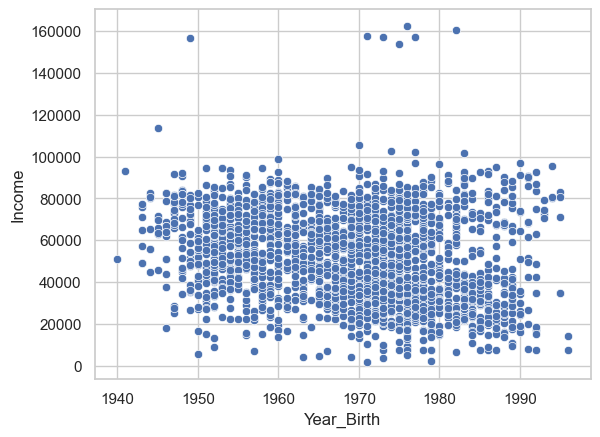

In [15]:
sns.scatterplot(df.query("Income < 600000"), x='Year_Birth', y='Income')
# plt.ylim(700_000)

> #### add feature pembagian 

-----------------